In [1]:
import pandas as pd 

In [39]:
df = pd.read_csv('data/all_models_greedy_mult_choice.csv')

/tmp/ipykernel_2684082/321814785.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/all_models_greedy_mult_choice.csv')


In [88]:
df['country'].unique()

array(['Turkey', 'France', 'Bangladesh', 'Russia', 'United States'],
      dtype=object)

In [90]:
df["translated"] = df.apply(lambda x: True if x["country"] == "United States" else x["lang"]!="English", axis=1)
string_form = lambda x: ("w/" if x["hint"] else "w/o") + " Hint | " + ("w/" if x["translated"] else "w/o") + " Tr."
df["hint_translated"] = df.apply(string_form, axis=1)
df = df.query("hint_translated != 'w/o Hint | w/o Tr.'")



In [91]:
df['correct'] = df['ans_type'].apply(lambda x: 1 if x == 'local' else 0)

In [92]:
import re 
# regex to extrat integer
df['output_num'] = df['output'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

In [93]:
df2 = df[df['hint_translated'] == 'w/o Hint | w/ Tr.']
df2.groupby(['model', 'output_num'])['correct'].count()

model            output_num
aya_8b_it        1.0            5661
                 2.0            6348
                 4.0              19
gemma2_27b_it    1.0            4828
                 2.0            8570
                 3.0              11
gemma2_9b_base   1.0            9118
                 2.0            3058
                 3.0            1234
gemma2_9b_it     1.0            5481
                 2.0            7900
                 3.0               1
                 4.0               4
gpt4o            1.0            6049
                 2.0            2451
                 3.0             298
llama31_70b_it   1.0             999
                 2.0           12374
                 3.0               5
llama31_8b_base  1.0            9478
                 2.0            3932
llama31_8b_it    1.0            1435
                 2.0           11973
                 3.0               2
Name: correct, dtype: int64

In [97]:
df3 = df.groupby(['hint_translated','model','country'])['correct'].mean().reset_index()

In [98]:
df3

,hint_translated,model,country,correct
0,w/ Hint | w/ Tr.,aya_8b_it,Bangladesh,0.106923
1,w/ Hint | w/ Tr.,aya_8b_it,France,0.867805
2,w/ Hint | w/ Tr.,aya_8b_it,Russia,0.880690
3,w/ Hint | w/ Tr.,aya_8b_it,Turkey,0.920775
4,w/ Hint | w/ Tr.,aya_8b_it,United States,0.902417
...,...,...,...,...
107,w/o Hint | w/ Tr.,llama31_8b_it,Bangladesh,0.522961
108,w/o Hint | w/ Tr.,llama31_8b_it,France,0.504111
109,w/o Hint | w/ Tr.,llama31_8b_it,Russia,0.499760
110,w/o Hint | w/ Tr.,llama31_8b_it,Turkey,0.519366


In [99]:
df['hint_translated'].unique()

array(['w/ Hint | w/o Tr.', 'w/ Hint | w/ Tr.', 'w/o Hint | w/ Tr.'],
      dtype=object)

In [104]:
df31 = df3[df3['hint_translated'] == 'w/o Hint | w/ Tr.']
df32 = df3[df3['hint_translated'] == 'w/ Hint | w/o Tr.']
df321 = df3[(df3['hint_translated'] == 'w/ Hint | w/ Tr.') & (df3['country'] == 'United States')]
df32 = pd.concat([df32, df321])

In [105]:
df31.reset_index(drop=True, inplace=True)
df32.reset_index(drop=True, inplace=True)

In [83]:
# df31.merge(df32, on=['model'], suffixes=('_no_hint', '_with_hint'))

In [108]:
data =df31.merge(df32, on=['model', 'country'], suffixes=('_no_hint', '_with_hint'))

In [111]:
data['diff'] = data['correct_with_hint'] - data['correct_no_hint']
# df32['lang'] = df31['lang']


In [115]:
data = data.pivot(index='country', columns='model', values='diff')

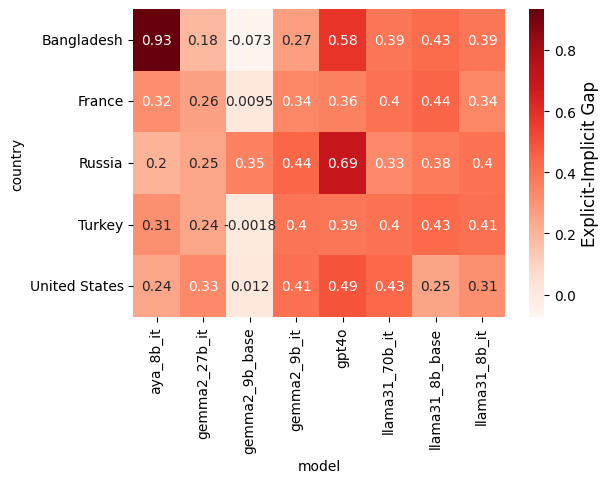

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
heatmap = sns.heatmap(data, annot=True, cmap='Reds', ax=ax)
# plt.colorbar(ax.collections[0], label='Explicit-Implicit Gap')
heatmap.collections[0].colorbar.set_label('Explicit-Implicit Gap', fontsize=12)


plt.savefig('visuals/explicit_implicit_gap.pdf', dpi=300, bbox_inches='tight')
plt.show()